In [63]:
#Student Name: Tony Yang
#Student Number:1003289229

#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

In [64]:
# Read data
df = pd.read_excel("INF2178_A2_data.xlsx")

In [65]:
# Preview first 10 columns
df.head(10)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [66]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [67]:
# Check null values
df.isnull().sum()

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

In [68]:
# Remove irrelevant columns
column_to_drop = ['_id','LOC_ID','LOC_NAME','ADDRESS','PCODE','bldg_type','BLDGNAME','ward','subsidy']
df.drop(columns=column_to_drop,inplace=True,axis=1)
df

,AUSPICE,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,cwelcc_flag
0,Non Profit Agency,0,20,32,52,60,164,Y
1,Non Profit Agency,0,0,12,26,45,83,Y
2,Non Profit Agency,0,10,16,26,50,102,Y
3,Non Profit Agency,10,15,40,0,0,65,Y
4,Non Profit Agency,0,10,16,0,0,26,Y
...,...,...,...,...,...,...,...,...
1058,Non Profit Agency,0,0,0,52,60,112,Y
1059,Non Profit Agency,0,25,35,0,0,60,N
1060,Non Profit Agency,0,25,24,0,0,49,N
1061,Non Profit Agency,0,0,0,26,30,56,Y


In [69]:
# Generate descriptive statistics of data
df.describe()

,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


**1.Exploratory Data Analysis**

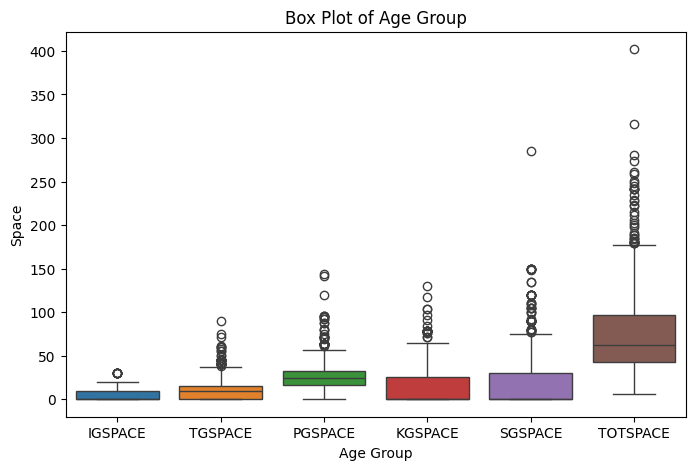

In [70]:
# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE','TOTSPACE']])
# Set labels and title
plt.title('Box Plot of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Space')

# Show the plot
plt.show()

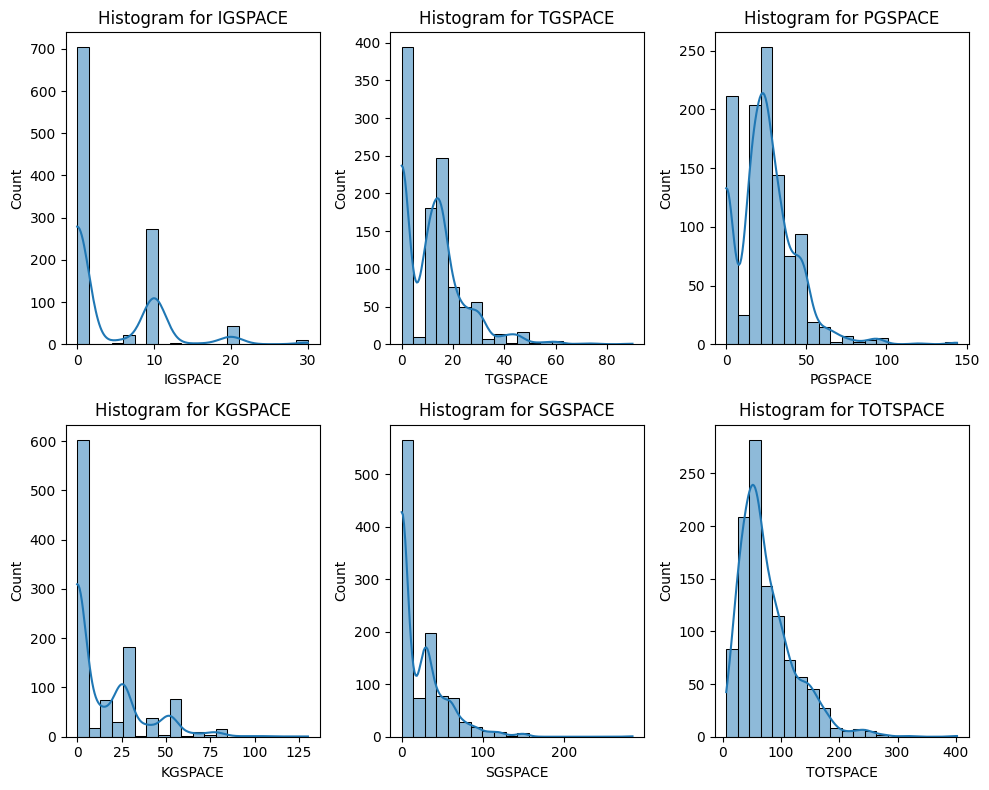

In [71]:
# Variables Names
variables = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Create histogram plots for each variable
for i, variable in enumerate(variables):
    sns.histplot(x=df[variable], ax=axes[i // 3, i % 3], bins=20, kde=True)  # Creating histogram
    axes[i // 3, i % 3].set_title(f'Histogram for {variable}')  # Set the title

plt.tight_layout()
plt.show()

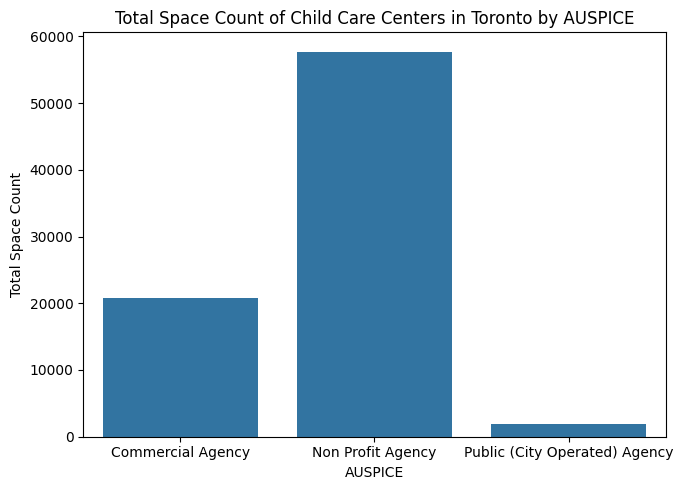

In [72]:
# New data frame for AUSPICE and TOTSPACE
df_auspice_space= df.groupby('AUSPICE')['TOTSPACE'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(7, 5))
sns.barplot(data=df_auspice_space, x='AUSPICE', y='TOTSPACE')
plt.title('Total Space Count of Child Care Centers in Toronto by AUSPICE')
plt.xlabel('AUSPICE')
plt.ylabel('Total Space Count')
plt.tight_layout()
plt.show()

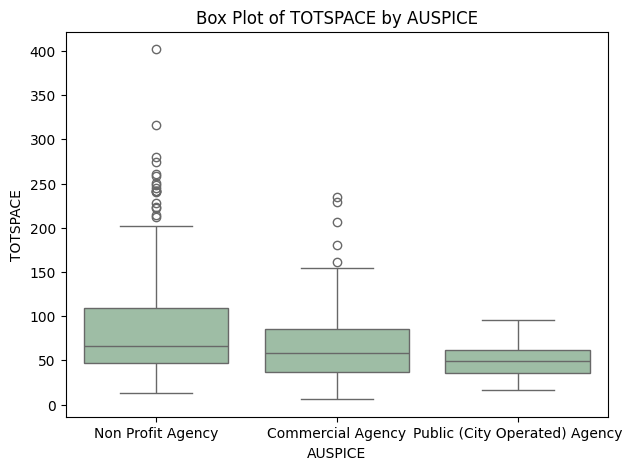

In [73]:
# Create the box plot
plt.figure(figsize =(7,5))
ax = sns.boxplot(x=df['AUSPICE'], y=df['TOTSPACE'], data=df, color='#99c2a2')

# Set labels and title
ax.set_xlabel('AUSPICE')
ax.set_ylabel('TOTSPACE')
ax.set_title('Box Plot of TOTSPACE by AUSPICE')

# Show the plot
plt.show()

**2.One-Way ANOVA**

In [74]:
# Ordinary Least Squares (OLS) model
print("OLS MODEL")
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print('\n')

#Anova Table
print("ANOVA table")
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
print(res.anova_summary)
print('\n')

# Compare p-value with 0.05
p_values = anova_table['PR(>F)'][0]
print('H0: There is no significant difference among the means of the groups')
print('H1: At least one group mean is significantly different from the others')
print('\n')
if p_values < 0.05:
  print("We reject the null hypothesis sine p-value is less than 0.05.")
else:
  print("We fail to reject the null hypotheis since p-value is greater than 0.05")

OLS MODEL
                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


ANOVA table
                df        sum_sq       mean_sq          F        PR(>F)
C(AUSPICE)     2.0  9.611211e+04  48056.057145  21.843051  5.057716e-10
Residual    1060.0  2.332065e+06   2200.061571        NaN           NaN


H0: There is no significant difference among the means of the groups
H1: At least one group mean is significantly different from the others


We reject the null hypothesis sine p-value is less than 0.05.


In [75]:
#Post hoc test using Tukey's HSD test to identify specific differences between group means in ANOVA when there are multiple groups involved
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


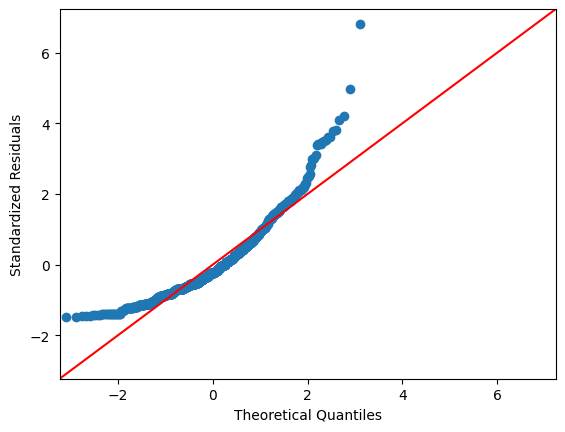

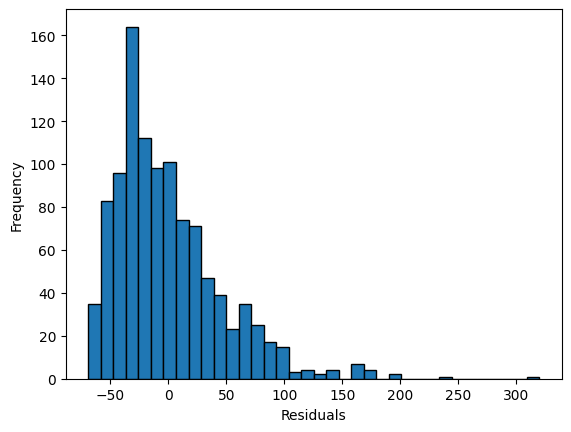

In [76]:
import statsmodels.api as sm
# Assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [77]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

if pvalue > 0.05:
    print("Data looks normally distributed since p value is greater than 0.05")
else:
    print("Data does not look normally distributed since p value is less than 0.05")


0.901775598526001 1.4964898448030214e-25
Data does not look normally distributed since p value is less than 0.05


In [78]:
# Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


**3.Two-Way ANONA**

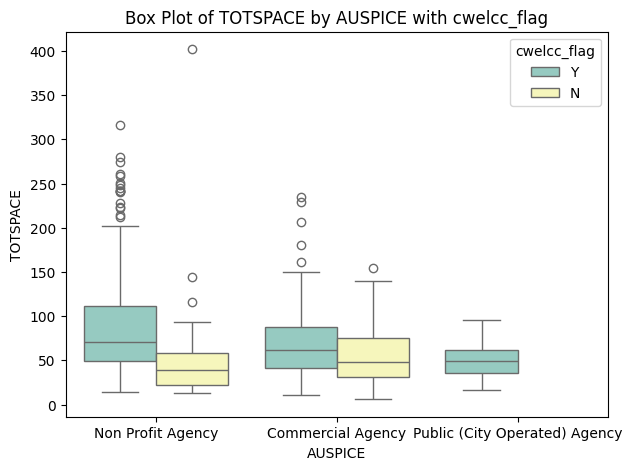

In [79]:
# Boxplot of TOTSPACE across different AUSPICE and CWELCC_FLAG
fig = plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="cwelcc_flag",data=df, palette="Set3")

# Set labels and title
ax.set_label('AUSPICE')
ax.set_ylabel('TOTSPACE')
ax.set_title('Box Plot of TOTSPACE by AUSPICE with cwelcc_flag')
plt.show()

In [80]:
# OLS model
model=ols('TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.083348e+05,2.0,25.188746,6.095400e-07
C(cwelcc_flag),3.768832e+04,1.0,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.949561e+04,2.0,6.857975,1.098398e-03
Residual,2.275187e+06,1058.0,NaN,NaN


In [81]:
# ANOVA Table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.anova_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.083348e+05,54167.406210,25.188746,6.095400e-07
C(cwelcc_flag),1.0,3.768832e+04,37688.323276,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.0,2.949561e+04,14747.806131,6.857975,1.098398e-03
Residual,1058.0,2.275187e+06,2150.460631,NaN,NaN


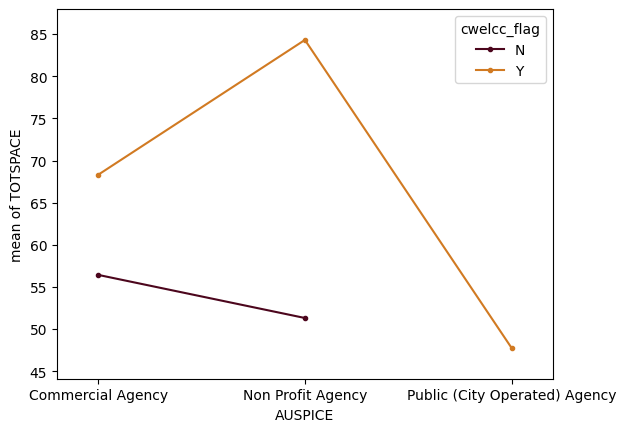

In [82]:
# Interaction Plot
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=df['AUSPICE'],trace=df['cwelcc_flag'],response=df['TOTSPACE'],colors=['#4c061d','#d17a22'])



In [83]:
# Perform Tukey's HSD test
res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.787652,24.451182,7.750298,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.429346,52.239874,6.364868,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.241554,35.671940,3.095956,0.073556


In [84]:
# Perform Tukey's HSD test
res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='cwelcc_flag',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,24.101945,15.772582,32.431309,8.029722,0.001


In [85]:
# Perform Tukey's HSD test
res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','cwelcc_flag'],anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary.head()


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",32.990302,12.999232,52.981373,6.662830,0.001
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",15.993434,5.864514,26.122354,6.375101,0.001
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",27.876118,12.994318,42.757918,7.562847,0.001
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",36.540220,14.719584,58.360857,6.761020,0.001
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900


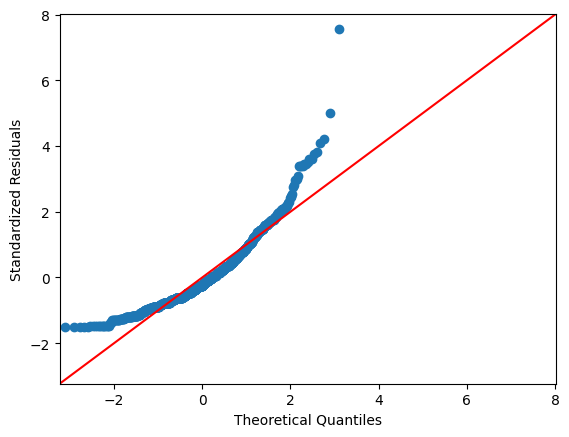

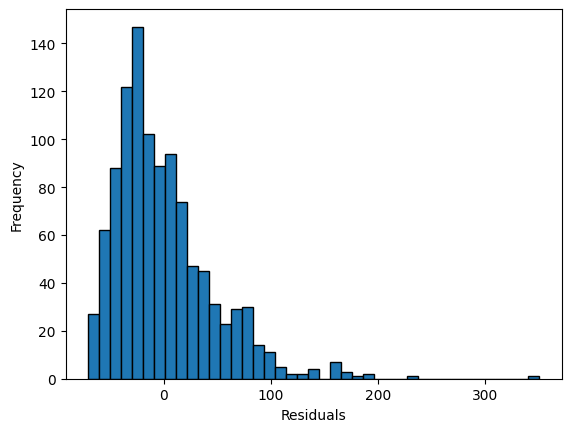

In [86]:
# Assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [87]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

if pvalue > 0.05:
    print("Data looks normally distributed since p value is greater than 0.05")
else:
    print("Data does not look normally distributed since p value is less than 0.05")

0.8972285389900208 4.5834627426744554e-26
Data does not look normally distributed since p value is less than 0.05


In [88]:
# Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
statistic, p_value = stats.levene( *[group['TOTSPACE'].values for name, group in df.groupby(['AUSPICE', 'cwelcc_flag']) ])
print('Levene’s test statistic is :', statistic)
print('Levene’s test p-value is :', p_value)

Levene’s test statistic is : 10.026555760700413
Levene’s test p-value is : 5.754326496635005e-08


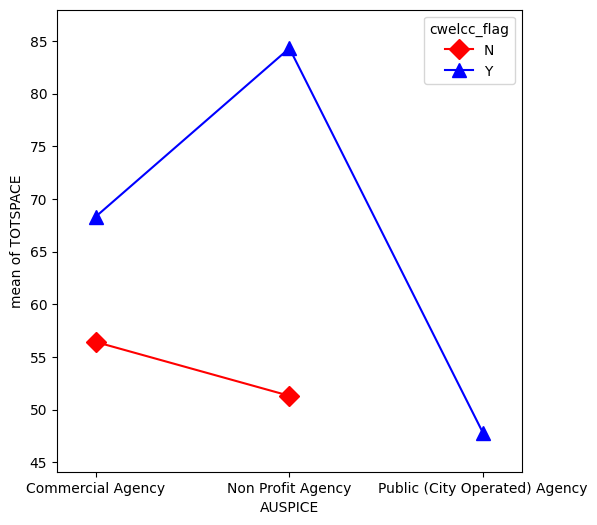

In [89]:
# Interaction plot
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(x=df['AUSPICE'],trace=df['cwelcc_flag'],response=df['TOTSPACE'],colors=["red","blue"],markers=["D","^"],ms=10,ax=ax,)